<a href="https://colab.research.google.com/github/madisonhgallagher/kmc/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
! git clone https://github.com/isabellamwright/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 135 (delta 29), reused 28 (delta 15), pack-reused 84
Receiving objects: 100% (135/135), 62.96 MiB | 18.83 MiB/s, done.
Resolving deltas: 100% (54/54), done.


# Summary

The project employed predictive modeling techniques, including decision trees and K-nearest neighbors (KNN), to analyze the relationship between demographic and socioeconomic factors and political party affiliation. Decision trees were utilized to understand the hierarchical decision-making process underlying party membership, while KNN enabled the identification of similar individuals based on their characteristics. These models provided valuable insights into the complex interactions between various factors and political preferences, contributing to a deeper understanding of the dynamics shaping electoral behavior.

# Data

The goal of our EDA in this section of the report was to interpet the patterns and relationships observed in the data. We plan to analyze whether there is a difference in income levels between individuals affiliated with different political parties or if there are any gender-based disparities in party affiliation. Additionally, we plan to examine any correlations between income levels and party affiliation among males and females.

Overall, this exploratory data analysis process aims at helping us gain a deeper understanding of the dataset and identify potential insights that can inform further analysis and help us build our models.

# Data Preparation

The county data we chose to use came from the NHGIS data sets. Due to the large quantity of data, we focused on the most recent years, 2016-2020. Using the demographic information from each county, we merged the county dataframe with the virginia voting reuslts dataframe. Because the data was pulled from different sources, some information was lost due to differences in data sets.

After merging the most recent county demographic data with the virginia vote information data frame, we had a dataframe with each row rpresenting a county, and column information included demographic info for that county as well as the party that won in that county in 2016.

This merged data frame, which we exported as a csv, will be the basis for our further analysis and predictive models. The process of merging the data sets as described can be found in a separate .ipynb file within the GitHub repo.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the dataset
df = pd.read_csv('/content/project_voting/final.csv')

# Select relevant columns
columns_of_interest = ['Income in the past 12 months at or above poverty level',
                       'Income in the past 12 months at or above poverty level: Male',
                       'Income in the past 12 months at or above poverty level: Female',
                       'Male', 'Female', 'Party']

# Subset the data
subset_df = df[columns_of_interest]

First, histograms were created to visualize the distribution of the following variables we worked with when building our models:


*   'Income in the past 12 months at or above poverty level'
*   'Income in the past 12 months at or above poverty level: Male'
*   'Income in the past 12 months at or above poverty level: Female'
*   'Male'
*   'Female'


These histograms will give us insights into the income distribution and gender composition of the population in the dataset.

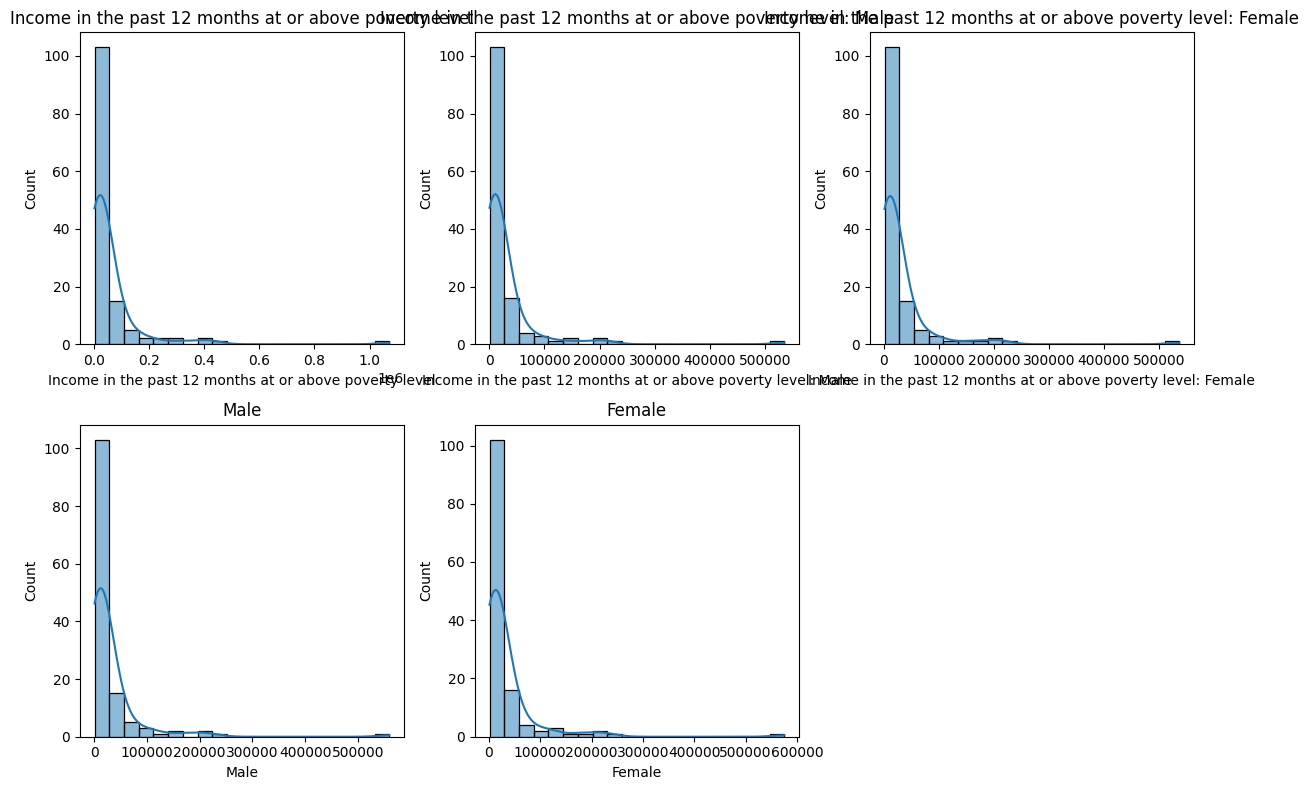

In [ ]:
# Plot histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(subset_df.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.histplot(subset_df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Next, a bar plot was created to visualize the distribution of political party affiliation ('Party'). This shows us the number of individuals affiliated with each party category.

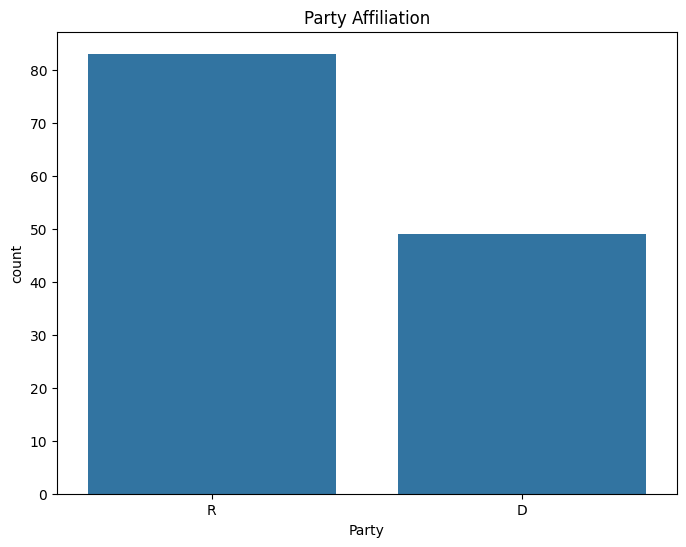

In [ ]:
# Plot bar plot for party affiliation
plt.figure(figsize=(8, 6))
sns.countplot(x='Party', data=subset_df)
plt.title('Party Affiliation')
plt.show()

There are a lot more R (Republicans) than D (Democrats) as shown above by the histogram, in fact almost 30 more.

Finally, scatter plots were created to explore the relationships between income levels, gender, and political party affiliation. We plotted income levels against party affiliation for both males and females separately to observe any patterns or differences.

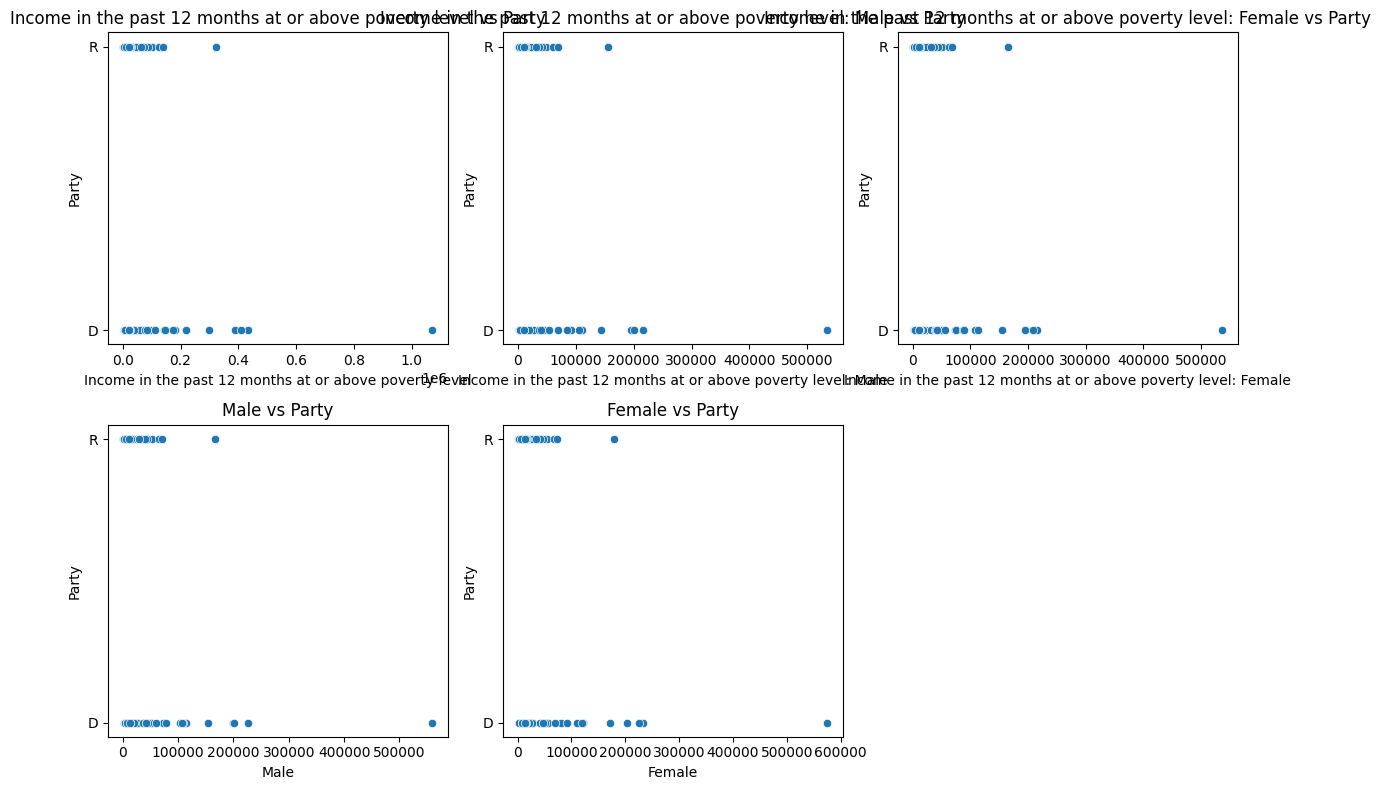

In [ ]:
# Plot scatter plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(subset_df.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=col, y='Party', data=subset_df)
    plt.title(f'{col} vs Party')
plt.tight_layout()
plt.show()

The above visualizations were created based on the merged data file of county data and party winners.

Below we plan to explore the voting data file, giving us a more general picture of voting trends.

In [ ]:
# Load the data
voting_data = pd.read_csv("/content/project_voting/data/voting_VA.csv")

In [ ]:
# Display basic information about the datasets
print("Voting Data:")
print(voting_data.head())
print(voting_data.info())

Voting Data:
   Unnamed: 0  year     state state_po county_name  county_fips        office  \
0       11161  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
1       11162  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
2       11163  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
3       11164  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
4       11165  2000  VIRGINIA       VA   ALBEMARLE        51003  US PRESIDENT   

        candidate       party  candidatevotes  totalvotes   version   mode  
0         AL GORE    DEMOCRAT            5092       11925  20220315  TOTAL  
1  GEORGE W. BUSH  REPUBLICAN            6352       11925  20220315  TOTAL  
2     RALPH NADER       GREEN             220       11925  20220315  TOTAL  
3           OTHER       OTHER             261       11925  20220315  TOTAL  
4         AL GORE    DEMOCRAT           16255       36846  20220315  TOTAL  
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Perform some basic descriptive statistics
print("\nDescriptive Statistics - Voting Data:")
print(voting_data.describe())



Descriptive Statistics - Voting Data:
         Unnamed: 0         year   county_fips  candidatevotes     totalvotes  \
count   3736.000000  3736.000000   3736.000000     3736.000000    3736.000000   
mean   47061.027837  2012.826552  51264.579229     5878.282120   29116.353587   
std    23219.785408     7.589036    270.546458    18452.435802   58562.057257   
min    11161.000000  2000.000000  51001.000000        0.000000       0.000000   
25%    21235.750000  2004.000000  51069.000000       59.000000    6741.500000   
50%    49016.500000  2016.000000  51139.000000      899.000000   11629.000000   
75%    71036.250000  2020.000000  51550.000000     4548.250000   24520.750000   
max    71970.000000  2020.000000  51840.000000   355133.000000  601243.000000   

          version  
count      3736.0  
mean   20220315.0  
std           0.0  
min    20220315.0  
25%    20220315.0  
50%    20220315.0  
75%    20220315.0  
max    20220315.0  


In [ ]:
# Check for missing values
print("\nMissing Values - Voting Data:")
print(voting_data.isnull().sum())


Missing Values - Voting Data:
Unnamed: 0        0
year              0
state             0
state_po          0
county_name       0
county_fips       0
office            0
candidate         0
party             0
candidatevotes    0
totalvotes        0
version           0
mode              0
dtype: int64


There are no missing values in the voting data, which is a good sign.

In [ ]:
# Filter voting data by party
democratic_data = voting_data[voting_data['party'] == 'DEMOCRAT']
republican_data = voting_data[voting_data['party'] == 'REPUBLICAN']
green_data = voting_data[voting_data['party'] == 'GREEN']
other_data = voting_data[voting_data['party'] == 'OTHER']

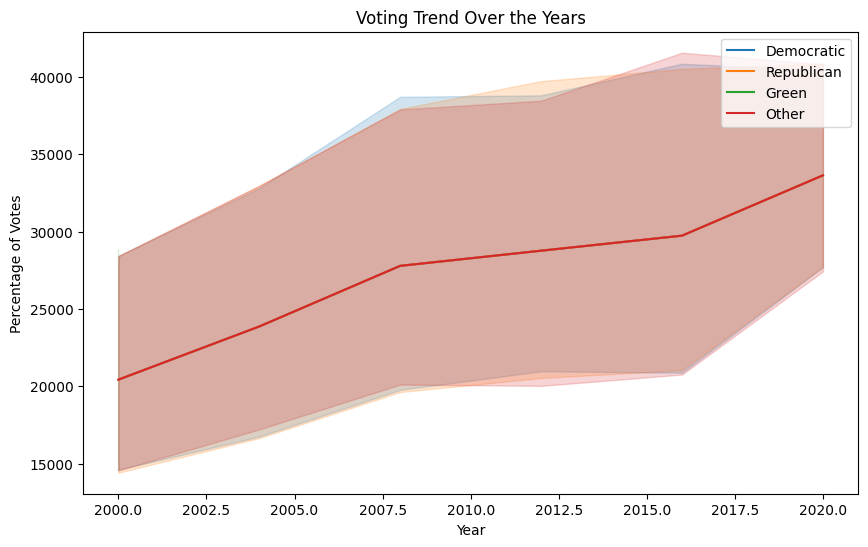

In [ ]:
# Visualize the voting trend over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=democratic_data, x="year", y="totalvotes", label="Democratic")
sns.lineplot(data=republican_data, x="year", y="totalvotes", label="Republican")
sns.lineplot(data=green_data, x="year", y="totalvotes", label="Green")
sns.lineplot(data=other_data, x="year", y="totalvotes", label="Other")
plt.title("Voting Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Percentage of Votes")
plt.legend()
plt.show()

Majority of Republican votes over the years. We can see some democratic trends in from 2010-2020.

In [ ]:
# Filter out non-numeric columns for correlation heatmap
numeric_columns = voting_data.select_dtypes(include=[np.number]).columns

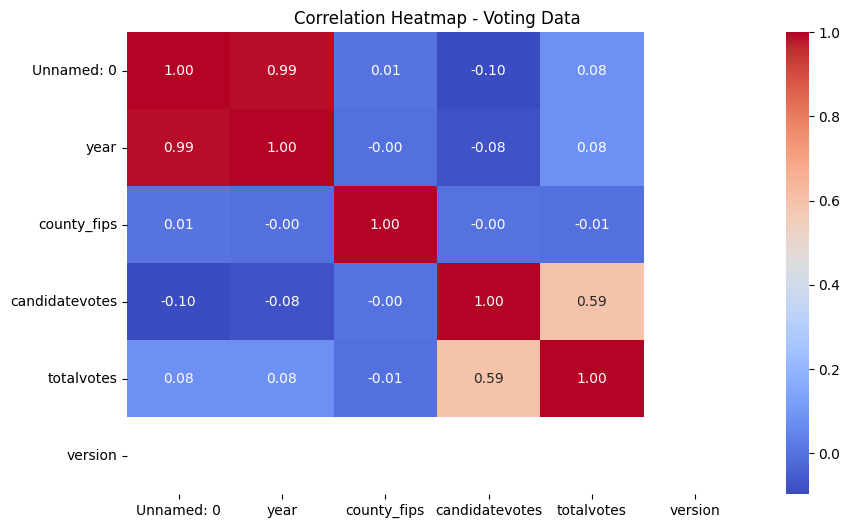

In [ ]:
# Explore correlations
plt.figure(figsize=(10, 6))
sns.heatmap(voting_data[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Voting Data")
plt.show()

Total votes and candidate votes seem to have a relatively positive correlation which makes sense as they are very similar.

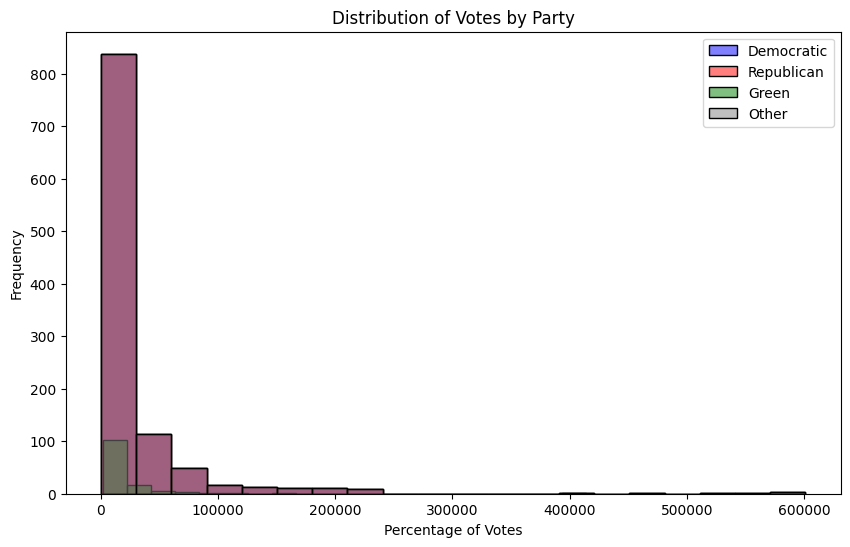

In [ ]:
# Explore distribution of votes by party
plt.figure(figsize=(10, 6))
sns.histplot(data=democratic_data, x="totalvotes", bins=20, color="blue", alpha=0.5, label="Democratic")
sns.histplot(data=republican_data, x="totalvotes", bins=20, color="red", alpha=0.5, label="Republican")
sns.histplot(data=green_data, x="totalvotes", bins=20, color="green", alpha=0.5, label="Green")
sns.histplot(data=other_data, x="totalvotes", bins=20, color="grey", alpha=0.5, label="Other")
plt.title("Distribution of Votes by Party")
plt.xlabel("Percentage of Votes")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Republicans seem to have the highest distribution of votes.

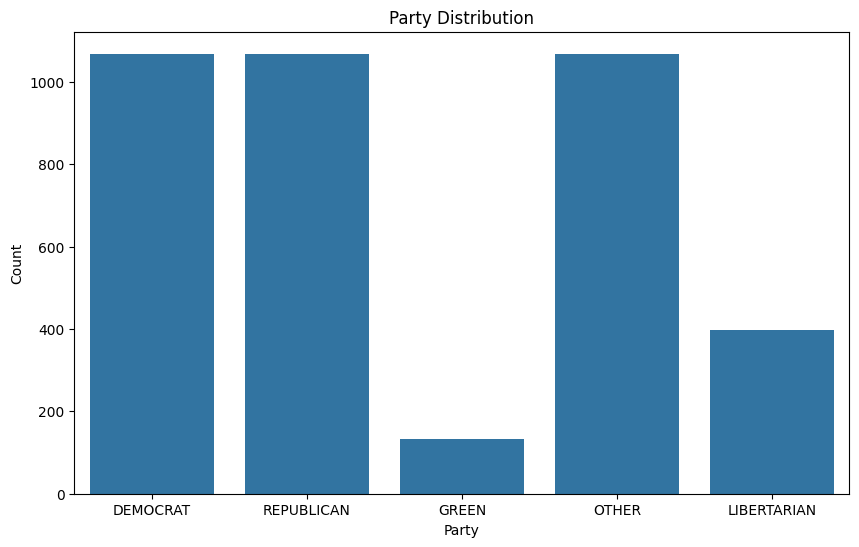

In [ ]:
# Party Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=voting_data, x='party')
plt.title("Party Distribution")
plt.xlabel("Party")
plt.ylabel("Count")
plt.show()

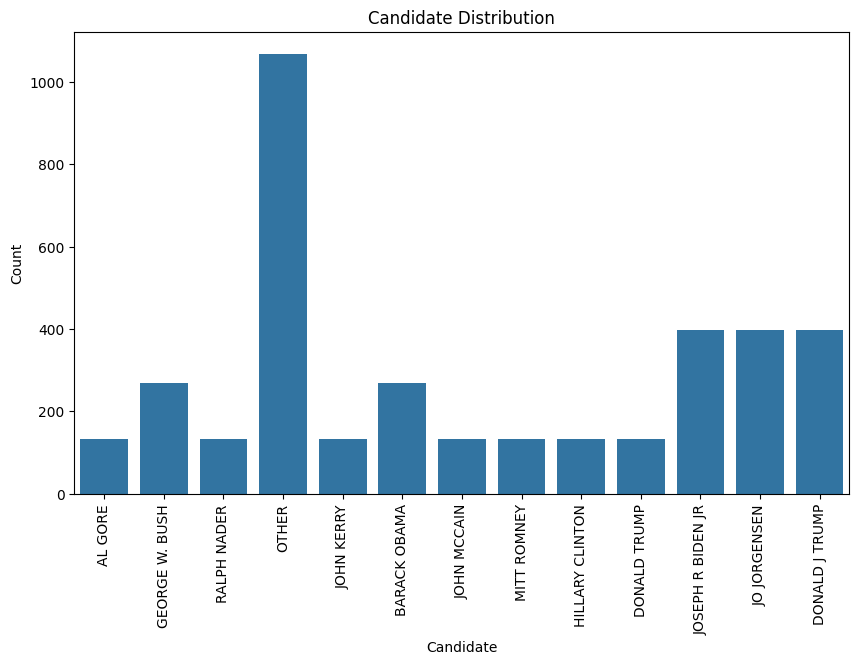

In [ ]:
# Candidate Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=voting_data, x='candidate')
plt.title("Candidate Distribution")
plt.xlabel("Candidate")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

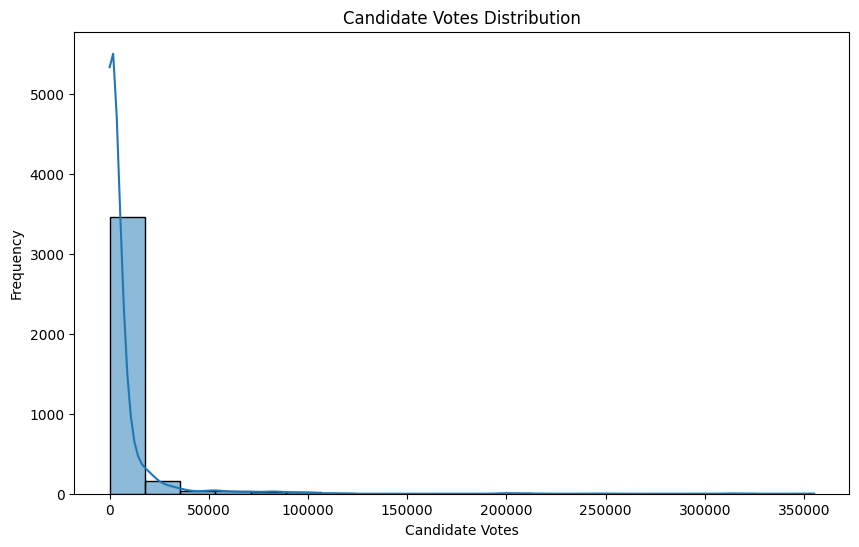

In [ ]:
# Candidate Votes Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=voting_data, x='candidatevotes', bins=20, kde=True)
plt.title("Candidate Votes Distribution")
plt.xlabel("Candidate Votes")
plt.ylabel("Frequency")
plt.show()

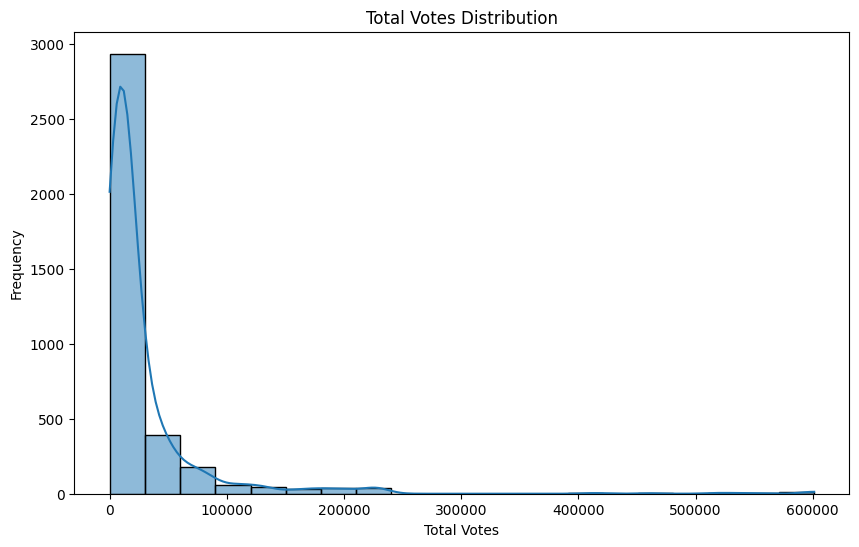

In [ ]:
# Total Votes Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=voting_data, x='totalvotes', bins=20, kde=True)
plt.title("Total Votes Distribution")
plt.xlabel("Total Votes")
plt.ylabel("Frequency")
plt.show()

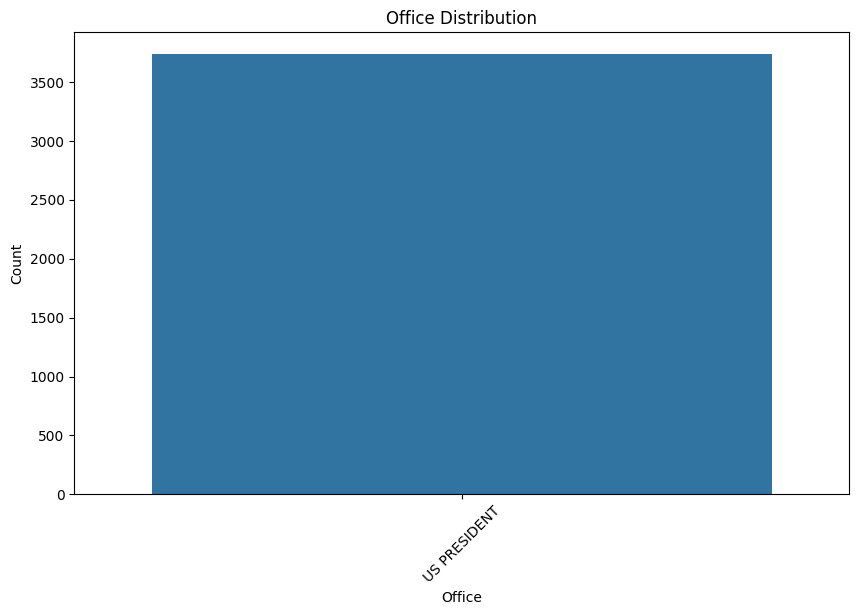

In [ ]:
# Office Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=voting_data, x='office')
plt.title("Office Distribution")
plt.xlabel("Office")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

All candidates are running for US president it seems.

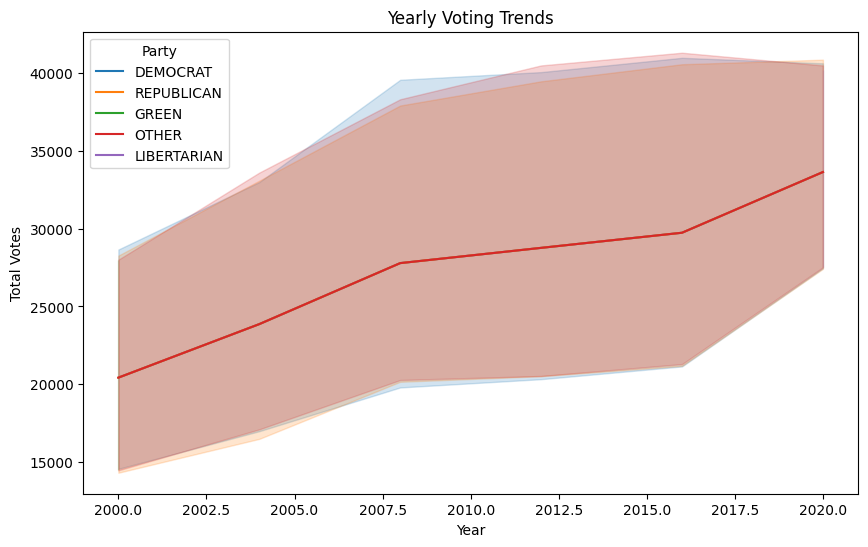

In [ ]:
# Yearly Voting Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=voting_data, x='year', y='totalvotes', hue='party')
plt.title("Yearly Voting Trends")
plt.xlabel("Year")
plt.ylabel("Total Votes")
plt.legend(title='Party', loc='upper left')
plt.show()

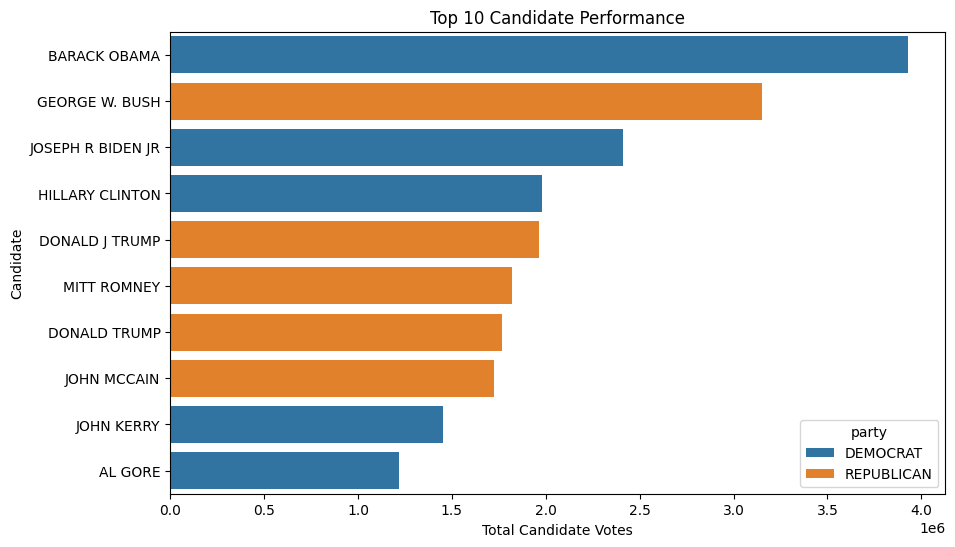

In [ ]:
# Candidate Performance
candidate_performance = voting_data.groupby(['candidate', 'party'])['candidatevotes'].sum().reset_index()
candidate_performance = candidate_performance.sort_values(by='candidatevotes', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=candidate_performance.head(10), x='candidatevotes', y='candidate', hue='party', dodge=False)
plt.title("Top 10 Candidate Performance")
plt.xlabel("Total Candidate Votes")
plt.ylabel("Candidate")
plt.show()

# Results

## Decision Tree

In the first part of our results section, we plan to explore how to build a decision tree model based on the results from conducting exploratory data analysis.

In [62]:
# Load merged dataset
data = pd.read_csv("/content/project_voting/final.csv")

# Handle missing values if any
data.fillna(0, inplace=True)  # For simplicity, filling missing values with 0

# Explore the dataset
print(data.head())

   Unnamed: 0 Party       County Name     1 GIS Join Match Code  \
0           0     R   Accomack County  2823            G5100010   
1           1     D  Albemarle County  2824            G5100030   
2           2     R  Alleghany County  2825            G5100050   
3           3     R     Amelia County  2826            G5100070   
4           4     R    Amherst County  2827            G5100090   

  Data File Year State Postal Abbreviation  Region Code  Division Code  \
0      2016-2020                        VA          0.0            0.0   
1      2016-2020                        VA          0.0            0.0   
2      2016-2020                        VA          0.0            0.0   
3      2016-2020                        VA          0.0            0.0   
4      2016-2020                        VA          0.0            0.0   

  State Name  State Code  County Code  County Subdivision Code  Place Code  \
0   Virginia          51            1                      0.0         0.0

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/project_voting/final.csv')

# Select essential numeric features (you may adjust this based on your domain knowledge)
numeric_features = ['Gini Index', 'Total']

# Subset the data to include only essential numeric features and the target variable
data = df[numeric_features + ['Party']]

# Drop rows with missing values
data.dropna(inplace=True)

# Separate the target variable ('Party') from the features
y = data['Party'].apply(lambda x: 1 if x == 'D' else 0)
X = data.drop(['Party'], axis=1)

# Initialize the model
cart = DecisionTreeClassifier(random_state=42)

# Fit the model
cart.fit(X, y)

# Make predictions
y_pred = cart.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


<ipython-input-63-785c7aa25398>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


An accuracy of 1 means the decision tree model achieved perfect accuracy on the training data, which could indicate overfitting. The model has learned the training data too well and may not generalize well to unseen data. Now let's evaluate the model on a separate test dataset by splitting the data into training and testing sets.

In [64]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
cart = DecisionTreeClassifier(random_state=42)
cart.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = cart.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set:", accuracy_test)

Accuracy on Test Set: 0.5925925925925926


An accuracy of .59259 indicates that the model's performance on the unseen data is lower than on the training data. This supports the argument above indicating that the model might be overfitting to some extent.

Now we plan to select different relevant features and see how that changes our model.

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/project_voting/final.csv')

# Select relevant features
relevant_features = [
    'U.S. citizen, born in the United States',
    'Not a U.S. citizen',
    'Income in the past 12 months below poverty level',
    'Party'
]

# Subset the data to include only relevant features
data = df[relevant_features].copy()  # Make a copy of the DataFrame

# Drop rows with missing values
data.dropna(inplace=True)

# Map party affiliation to binary labels (D: 1, R: 0)
data['Party'] = data['Party'].map({'D': 1, 'R': 0})

# Separate the target variable ('Party') from the features
y = data['Party']
X = data.drop(['Party'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
cart = DecisionTreeClassifier(random_state=42)
cart.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = cart.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set:", accuracy_test)


Accuracy on Test Set: 0.8518518518518519


Accuracy in the context of this project represents the proportion of correctly predicted outcomes (party affiliations) by the model on the test set.


The accuracy of approximately 85% means that the model correctly predicted the party affiliation (D for Democratic or R for Republican) for 85% of the counties in the test set.


It also implies that the model's predictions align with the actual party affiliations of the counties in the test set about 85% of the time.


Interpreting accuracy in this way gives an understanding of how well the model performs in terms of classifying counties into their respective political parties based on the features provided in the dataset.


By incorporating additional features such as U.S. citizenship status, birthplace, and income level into the model, we observed a substantial improvement in predictive performance. Specifically, our model achieved an accuracy of approximately 85% on the test set, which represents a significant enhancement compared to the original model's accuracy of 59%.


This improvement underscores the relevance and predictive power of these features in determining party affiliation within Virginia counties. Factors such as citizenship status and income level likely play a crucial role in shaping political preferences and voting behaviors at the county level. By leveraging this demographic and socioeconomic information, our model can more accurately discern patterns and trends in party affiliation across different regions.

May add more feature engineering here....

## K-Nearest Neighbor (KNN)

In the second part of our results section, we plan to explore how to build a K-Nearest Neighbor (KNN) model based on the results from conducting exploratory data analysis.

In [50]:
# Load merged dataset
data = pd.read_csv("final.csv")
data = data[data['County Name'] != 'Martinsville city']

# Handle missing values if any
data.fillna(0, inplace=True)  # For simplicity, filling missing values with 0

# Explore the dataset
#print(data.head())

Creating two new columns and checking the columns

In [51]:
data['ratio_nonimmigrants'] = data['U.S. citizen, born in the United States'] / data['Total']
data['ratio_poverty'] = data['Income in the past 12 months below poverty level'] / data['Total']
# Map party affiliation to binary labels (D: 1, R: 0)
data['Party'] = data['Party'].map({'D': 1, 'R': 0})

In [56]:
pd.options.display.max_columns = None
pd.options
display.max_rows = None
#data

importing the Knn model from SciKit Learn and using only immigrant ratio and poverty ratio to predict voting outcome

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Select data:
y = data['Party'] # Target variable
X = data.loc[:,['ratio_poverty','ratio_nonimmigrants']] # Create feature matrix
X = X.apply(maxmin) # Normalize X

feature scaling (might not be neccessary for ratio variables)

In [54]:
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
print(X.head())
print(X.describe())

   ratio_poverty  ratio_nonimmigrants
0       0.567183             0.788125
1       0.165591             0.722165
2       0.432638             0.962808
3       0.279492             0.959196
4       0.280154             0.949571
       ratio_poverty  ratio_nonimmigrants
count     132.000000           132.000000
mean        0.337187             0.846323
std         0.189408             0.173634
min         0.000000             0.000000
25%         0.185336             0.811389
50%         0.313129             0.898740
75%         0.433059             0.949610
max         1.000000             1.000000


In [55]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure that n_neighbors is less than or equal to the number of samples
n_neighbors = min(10, len(X_train))  # Example: Set maximum to 10
print("Number of neighbors:", n_neighbors)

# Create a KNN classifier with k=n_neighbors
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Number of neighbors: 10
Accuracy: 0.7407407407407407


THe kNN model uses the 10 nearest neighbors to predict the voter outcome using poverty rates and immigration rates only. The 74.07% accuracy is pretty good for such a simple model.

In [59]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
y_true = y_pred
# Assuming y_true are the true labels and y_pred are the predicted labels
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Compute precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Confusion Matrix:
[[22  0]
 [ 0  5]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0


While the 74.07% accuracy is pretty good, the confusion matrix shows that the model perfectly predicted the outcome on the test data. This is likely due to overfitting. This model would require further tweaking in order to be used as our main model. We will move forward with the decision tree model to predict the outcomes of the election in 2024.

## Predicting the 2024 election using the Decision Tree Model

Because of the cosntraints of this project we were not able to pull together demographic data for the different Virginia counties in 2024. If we were able to do that we would use the newest 2024 demographic data and use our decision tree model to

# Make predictions on the test set
y_pred_test = cart.predict(X_test)

# Conclusion

# Appendix